# Predicting Clinical Trial Terminations
### Notebook 2: Preprocessing & EDA

**Author: Clement Chan**

---
Notes on the notebook:
- The previous notebook consists of the raw dataset and the steps involved in cleaning. We also performed preliminary EDA and highlighted the distribution of important columns and analyzed what potential features we should include in the model.
- In this notebook, we will complete a second round of more in-depth cleaning and exploratory data analysis. Our goal is to create a baseline model for statistical analysis, prepare for feature engineering and modelling.

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study (drug)... need to classify this futher. | object (dummies?)|
| Enrollment | Total estimated number of participants in a study or total actual enrollment? | float -> int |
| Funder Type | Funding type in category? | object (could classify into dummies) |
| Study Type | Interventional, Observational, or Expanded Access | object (definitely dummies) |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | object -> date |
| Primary Completion Date | Date the final participant was examined for the first outcome | object -> date |
| Completion Date | Date the final participant was examined | object -> date |
| First Posted | Date the clinical trial was first posted to the public      | object -> date  |
| Last Update Posted | Date the clinical trial was last posted to the public   | object -> date |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<a id = 'toc'><a/>
## Table of Contents

---
1. [Data Preprocessing](#prep)


**Load the dataset**

In [2]:
# make sure to not include the index_col
df = pd.read_csv('updated_ctg.csv', index_col = 0)

# First 5 rows of dataset
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,...,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Oral Ketone Monoester Supplementation and Rest...,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,other: placebo|dietary_supplement: β-ohb,"Brain network connectivity, Functional connect...","Working memory, Computer battery to assess wor...",McMaster University,"Alzheimer's Society of Brant, Haldimand Norfol...",...,30,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2023-10-25,2024-08,2024-08,2023-08-15,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K..."
2,Investigating the Effect of a Prenatal Family ...,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,...,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
3,Pre-exposure Prophylaxis (PrEP) for People Who...,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),...,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
4,Tailored Inhibitory Control Training to Revers...,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,...,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."


Let's find the total number of rows and columns in the data.

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 482350 rows and 23 columns.


Check the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482350 entries, 0 to 482349
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 482350 non-null  object
 1   Study Status                482350 non-null  object
 2   Brief Summary               482350 non-null  object
 3   Study Results               482350 non-null  object
 4   Conditions                  482350 non-null  object
 5   Interventions               482350 non-null  object
 6   Primary Outcome Measures    482350 non-null  object
 7   Secondary Outcome Measures  482350 non-null  object
 8   Sponsor                     482350 non-null  object
 9   Collaborators               482350 non-null  object
 10  Sex                         482350 non-null  object
 11  Age                         482350 non-null  object
 12  Phases                      482350 non-null  object
 13  Enrollment                  482350

In the previous notebook, our approach was to drop columns that contain a large amount of missing values, and impute them with the string 'unknown', 'missing', and 'none'. Now, we will target specific columns that seem to have a big impact or significance in determining the `Study Status` variable.

Since the `Study Status` column is our main dependent variable that we are predicting. Let's explore the distribution again, and see if we can minimize the amount of unique values or categories.
- Start by looking at the value counts
- Visualize the distribution of the categories
- Group common categories or remove categories that are insignificant to the model.

In [5]:
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

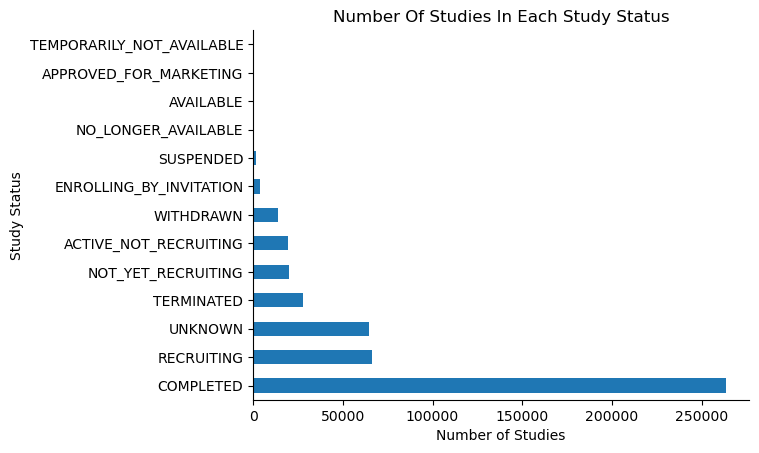

In [6]:
# Visualize counts with a graph
plt.figure()

df['Study Status'].value_counts().plot(kind='barh')

plt.title('Number of Studies in Each study status'.title())
plt.ylabel('Study Status')
plt.xlabel('Number of Studies')

sns.despine()
plt.show()

Most of the studies have been completed, which can cause some data imbalance in other classes such as our targeted 'Terminated' category. Let's continue with the cleaning, and see where we can group common categories together starting with the lowest counts `TEMPORARILY_NOT_AVAILABLE`.

In [7]:
# this option displays all columns in the dataframe
pd.options.display.max_columns = None

In [8]:
# slice out rows where study status is TEMPORARILY_NOT_AVAILABLE
df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
11239,Thrombosomes for Expanded Access Use,TEMPORARILY_NOT_AVAILABLE,Expanded use of Thrombosomes where a clinical ...,NO,Bleeding,biological: thrombosomes®,unknown,none,"Cellphire Therapeutics, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-11-06,2022-01-28,unknown
47190,"A Phase I Clinical Study of the Safety, Tolera...",TEMPORARILY_NOT_AVAILABLE,This study is designed to multiple dose and do...,NO,Healthy,drug: hx-1171,unknown,none,"Biotoxtech Co., Ltd",none,MALE,ADULT,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-06-28,2013-06-28,"Asan Medical Center, Special City of Seoul, Ko..."
53091,Treating Amyotrophic Lateral Sclerosis (ALS) W...,TEMPORARILY_NOT_AVAILABLE,R(+) pramipexole dihydrochloride monohydrate \...,NO,Amyotrophic Lateral Sclerosis,drug: r(+) pramipexole dihydrochloride monohyd...,unknown,none,"Bennett, James P., Jr., M.D., Ph.D.",University of Pittsburgh|University of Nebraska,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDIV,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2008-01-16,2012-07-25,unknown
53366,Development of a Fall Prevention and Fall Dete...,TEMPORARILY_NOT_AVAILABLE,The investigators plan to conduct a first-stag...,NO,Parkinson's Disease,other: portable motion detector,unknown,none,Far Eastern Memorial Hospital,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2010-12-20,2010-12-20,unknown
104237,Post-trial Access for Nipocalimab in Participa...,TEMPORARILY_NOT_AVAILABLE,The purpose of this post-trial access (PTA) pr...,NO,Warm Autoimmune Hemolytic Anemia,drug: nipocalimab,unknown,none,"Janssen Research & Development, LLC",none,unknown,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2022-02-03,2024-01-23,unknown


We can see that the rows where **(Study Status = Temporarily_not_available)** are missing a lot of information in the columns `Outcome_measures`, `Collaborators`, `Study Design`, and some `Locations`. Since this study status is neither completed or terminated, it doesn't provide any meaningful information to the model and we should remove these rows from the dataset.

In [9]:
# drop rows where study status = temp_not_available
df.drop(index = df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].index, inplace = True)

In [10]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
APPROVED_FOR_MARKETING        197
Name: count, dtype: int64

Next we should look at `APPROVED_FOR_MARKETING` status, and see where we can group those.

In [11]:
df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
8036,Expanded Access of Pimavanserin for Patients W...,APPROVED_FOR_MARKETING,The purpose of this program is to provide pati...,NO,Parkinson's Disease Psychosis,drug: pimavanserin tartrate,unknown,none,ACADIA Pharmaceuticals Inc.,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-05-05,2017-04-18,unknown
8345,18F-FDG PET Imaging in Cardiac Sarcoidosis,APPROVED_FOR_MARKETING,This study has been designed to provide patien...,NO,Cardiac Sarcoidosis,other: 18f-fluorodeoxyglucose (18f-fdg) pet/ct,unknown,none,British Columbia Cancer Agency,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-09,2022-02-04,"BC Cancer Agency, Vancouver, British Columbia,..."
8886,Early Access Treatment With Daratumumab for (R...,APPROVED_FOR_MARKETING,The objective of this study is to provide earl...,NO,Multiple Myeloma,drug: daratumumab,unknown,none,"Janssen Research & Development, LLC",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2015-06-23,2019-01-15,"Phoenix, Arizona, United States|Little Rock, A..."
10306,An Expanded Access Treatment Protocol of Enfor...,APPROVED_FOR_MARKETING,The primary purpose of this expanded access pr...,NO,Locally Advanced or Metastatic Urothelial Carc...,drug: enfortumab vedotin (ev),unknown,none,"Astellas Pharma Global Development, Inc.",Seagen Inc.,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-23,2020-01-13,"UCLA Hematology Oncology, Los Angeles, Califor..."
11729,An Expanded Access Study to Provide at Home Su...,APPROVED_FOR_MARKETING,"This single arm, multicenter study provides th...",NO,HER2-positive Breast Cancer,drug: pertuzumab and trastuzumab fixed-dose co...,unknown,none,"Genentech, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-05-20,2022-07-05,"Beverly Hills Cancer Center, Beverly Hills, Ca..."


Simiar to the temp_not_available, the category `APPROVED_FOR_MARKETING` is missing a lot of information in the same categories and do not provide much insight into completed or terminated trials. We can drop these rows as well.

In [12]:
# drop rows where study status = APPROVED_FOR_MARKETING
df.drop(index = df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].index, inplace = True)

In [13]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
Name: count, dtype: int64

Now, we will look into the `AVAILABLE` category to see where we can group those.

In [14]:
df[df['Study Status'] == 'AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
1049,Expanded Access to Ensartinib for Participants...,AVAILABLE,"This is an open-label, multicenter, intermedia...",NO,Non-Small Cell Lung Cancer|ALK Gene Rearrangem...,drug: ensartinib,unknown,none,"Xcovery Holdings, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-31,2022-10-20,"Stanford University, Stanford, California, 943..."
2621,Intermediate-size Expanded Access Program (EAP...,AVAILABLE,The objectives of this intermediate-size expan...,NO,Multisystem Inflammatory Syndrome in Children ...,biological: remestemcel-l|drug: hydrocortisone...,unknown,none,Mesoblast International Sàrl,none,ALL,CHILD,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-07-02,2023-05-06,unknown
3931,"Chronic Effect of Mat Pilates on Neuromotor, C...",AVAILABLE,The Pilates method aims to develop conscious c...,NO,Stroke|High Blood Pressure,other: mat pilates,unknown,none,Rio de Janeiro State University,Postgraduate scholarship,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2024-02-05,2024-02-14,"Jeferson Silva da Rocha, Rio De Janeiro, 20550..."
6425,Chelated Oral Iron Versus Intravenous Iron Suc...,AVAILABLE,compare the efficacy and safety of intravenous...,NO,Iron Deficiency Anemia of Pregnancy,drug: chelated iron|drug: iron sucrose,unknown,none,Assiut University,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-12-09,2021-12-09,unknown
7385,A Cohort IND Expanded Access Program for Suppo...,AVAILABLE,This Expanded Access Program aims to:\n\n1. Pr...,NO,Uveal Melanoma,drug: tebentafusp,unknown,none,Immunocore Ltd,"Clinigen, Inc.",ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-07-14,2022-01-21,unknown


These are the studies that are now available. However, this category is missing `Study Design`, some `Collaborators`, and `Outcome_measures`. These studies could still be waiting for more information to be filled in, so for now we will remove these rows as they will not affect our prediction model.

In [15]:
# drop rows where study status = AVAILABLE
df.drop(index = df[df['Study Status'] == 'AVAILABLE'].index, inplace = True)

In [16]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
Name: count, dtype: int64

The `NO_LONGER_AVAILABLE` status has 446 studies, let's see where we can group these.

In [17]:
df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
129846,Expanded Access to T89 for Treatment Use in In...,NO_LONGER_AVAILABLE,This expanded access use program will provide ...,NO,Covid19,drug: t89 capsule,unknown,none,"Tasly Pharmaceuticals, Inc.","Tasly Pharmaceutical Group Co., Ltd",ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-11-27,2023-08-08,"MultiCare Health System, Tacoma, Washington, 9..."
75546,Expanded Access Single Named Patient Program W...,NO_LONGER_AVAILABLE,To provide elotuzumab treatment for single-pat...,NO,Multiple Myeloma,drug: elotuzumab,unknown,none,Sundar Jagannath,Bristol-Myers Squibb,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2015-09-04,2015-09-04,"Icahn School.of Medicine at Mount Sinai, New Y..."
461013,Expanded Access Use of Stiripentol in Dravet S...,NO_LONGER_AVAILABLE,This is an expanded access use of Stiripentol ...,NO,Dravet Syndrome|Epileptic Encephalopathies Ass...,drug: stiripentol,unknown,none,Cook Children's Health Care System,none,ALL,"CHILD, ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2014-09-12,2020-02-05,"Cook Children's Medical Center, Fort Worth, Te..."
260134,An Expanded Access Study of Oral Liquid Efavir...,NO_LONGER_AVAILABLE,This study is being conducted to assess the sa...,NO,HIV Infection,drug: efavirenz,unknown,none,Bristol-Myers Squibb,none,ALL,CHILD,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,2000-09,2010-12,2010-12,2005-09-13,2014-01-09,"Local Institution, Phoenix, Arizona, 85016, Un..."
4585,ZYESAMI (Aviptadil) Intermediate Population Ex...,NO_LONGER_AVAILABLE,Patients with Critical COVID-19 and respirator...,NO,Critical COVID-19 With Respiratory Failure,drug: zyesami (aviptadil acetate),unknown,none,APR Applied Pharma Research s.a.,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-07-01,2023-02-03,"Dignity Health-Mercy Gilbert Medical Center, G..."


Similarly with the AVAILABLE status, this category is missing information from `outcome_measures`, some `collaborators`, `Phases`, and `Study design`. We can remove these rows as well.

In [18]:
# drop rows where study status = NO_LONGER_AVAILABLE
df.drop(index = df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].index, inplace = True)

In [19]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
Name: count, dtype: int64

The suspended status is when studies are halted for an indefinite amount of time, but can resume when proper conditions are met. Let's see where we can group these statuses.

In [20]:
df[df['Study Status'] == 'SUSPENDED'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
376035,Rare CNS Tumors Outcomes &Risk,SUSPENDED,Background:\n\nPrimary tumors of the brain and...,NO,High Grade Meningioma|Ependymoma|Medulloblasto...,unknown,Relationship between health status and disease...,none,National Cancer Institute (NCI),none,ALL,"ADULT, OLDER_ADULT",NO PHASE,326,NIH,OBSERVATIONAL,Observational Model: |Time Perspective: p,2017-08-21,2025-02-01,2025-02-26,2017-08-16,2023-11-07,National Cancer Institute (NCI)/ Neuro-Oncolog...
369308,Efficacy of Two Local Anesthetics on Quality o...,SUSPENDED,In this randomized controlled double-blinded s...,NO,"Pain, Postoperative|Quality of Life",drug: bupivacaine local anesthetic,Effects of Bupivacaine/Lidocaine will be asses...,none,NYU College of Dentistry,none,ALL,"ADULT, OLDER_ADULT",PHASE4,100,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2019-07-29,2024-10-01,2024-10-01,2021-03-09,2023-11-08,"NYU College of Dentistry, New York, New York, ..."
191207,Effect of Internet Therapeutic Intervention on...,SUSPENDED,This project will test the effectiveness of an...,NO,Type 2 Diabetes Mellitus,other: internet intervention,The primary endpoint is the A1c level or the c...,The secondary endpoints include severe hypogly...,Endocrine Research Society,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,50,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-02,unknown,unknown,2010-02-02,2011-06-29,"St. Paul's Hospital, Vancouver, British Columb..."
341760,The Leukemia and Lymphoma Society (LLS) T-cell...,SUSPENDED,Five hundred (500) patients participating in t...,NO,Covid-19,diagnostic_test: immunoseq,Number of people who have developed T cells fr...,none,"Larry Saltzman, MD",none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,1000,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-05-20,2031-05-20,2031-05-20,2021-05-24,2022-08-17,"Lymphoma and Leukemia Society, Rye Brook, New ..."
135699,Pleural Suction Additional to Thoracostomy Tub...,SUSPENDED,The primary treatment for traumatic hemothorax...,NO,Traumatic Hemothorax,procedure: pleural aspiration,"Clotted hemothorax, Rate of clotted hemothorax...","Pleural aspiration procedure complications, De...",Hospital Pablo Tobón Uribe,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-03-17,2024-03-05,2024-07-31,2020-08-25,2023-09-22,"Pablo Tobon Uribe Hospital, Medellin, Antioqui..."


If we look at the `Completion Date` column, we can see that some dates are set in the future (2025, 2028, etc). This means that these studies could potentially startup again when conditions are met. Therefore, we should remove these rows since they are neither completed or terminated.

In [21]:
# drop rows where study status = SUSPENDED
df.drop(index = df[df['Study Status'] == 'SUSPENDED'].index, inplace = True)

In [22]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
Name: count, dtype: int64

Now let's look at `ENROLLING_BY_INVITATION` to see where we can group these statuses with.

In [23]:
df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
284417,A Phase I Clinical Trial to Evaluate LIT-00814...,ENROLLING_BY_INVITATION,"This study is a multi-center, open, dose-incre...",NO,Advanced Solid Tumor,drug: lit-00814,"Incidence of adverse events, Up to 28 days pos...","Objective remission rate (ORR), according to t...",LittDD Medicines Ltd,none,ALL,"ADULT, OLDER_ADULT",PHASE1,81,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2023-10-14,2025-10-30,2026-06-30,2024-01-12,2024-01-12,"Cancer Hospital, Chinese Academy of Medical Sc..."
47610,Patient Reported Outcomes Study Using Electron...,ENROLLING_BY_INVITATION,"This is a multicenter, open-label, randomized,...",NO,Breast Cancer|Lung Cancer|Colorectal Cancer|Li...,other: e-pro monitoring,"Overall Survival (OS), After enrollment to dea...",HRQoL EORTC Quality of Life of Cancer Patients...,Comprehensive Support Project for Oncology Res...,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,500,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-01-26,2026-03-31,2027-03-31,2023-07-05,2023-07-05,"Kobe University Graduate School, Kobe, Hyogo, ..."
246177,Cohort/Ethics Study of Patients With Severe Al...,ENROLLING_BY_INVITATION,The purpose of this study is to develop a clin...,NO,"Liver Diseases, Alcoholic|Alcohol-Related Diso...",procedure: liver transplant,Number of participants who survived within 1 y...,Number of participants who self-report or have...,Johns Hopkins University,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",NO PHASE,300,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2020-04-01,2025-12-31,2025-12-31,2020-01-21,2023-04-11,"Johns Hopkins University, Baltimore, Maryland,..."
28859,Basic Yoga and Meditation Techniques,ENROLLING_BY_INVITATION,Purpose of the research; To determine the effe...,NO,Mediation,behavioral: meditation and yoga,"Anxiety, The effect of yoga and meditation on ...",none,Ataturk University,none,FEMALE,ADULT,NO PHASE,66,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2024-02-15,2024-04-15,2024-09-15,2024-01-11,2024-01-11,"Funda Çitil Canbay, Erzurum, 25000, Turkey"
407176,Experimental and Clinical Investigation of the...,ENROLLING_BY_INVITATION,"The goal of this single-center, randomised dou...",NO,Capsular Contracture Associated With Implant|F...,other: patient satisfaction questionnaire|diag...,wound bed fluid Immune cell profile (compositi...,"Intracapsular immune cell composition, After 6...",Medical University Innsbruck,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,14,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-01-20,2024-01-20,2025-01-20,2022-12-13,2022-12-13,"Medical University of Innsbruck, Department fo..."


The `ENROLLING_BY_INVITATION` status consists of studies that are currently selecting participants from a predetermine population for the research. Since this status is not within our scope of the problem, we can also remove these rows.

In [24]:
# drop rows where study status = `ENROLLING_BY_INVITATION`
df.drop(index = df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].index, inplace = True)

In [25]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                28014
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
WITHDRAWN                 13716
Name: count, dtype: int64

Next we will look at the `WITHDRAWN` status which has 13,716 studies.

In [26]:
df[df['Study Status'] == 'WITHDRAWN'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
479328,"The Effect of Metoprolol on Anaesthesia, the N...",WITHDRAWN,The purpose of the study is to test the effect...,NO,Breast Cancer,drug: metoprolol|drug: normal saline,"Anaesthesia, Total consumption of desflurane, ...","Safety and tolerability, Number of patients wi...",Kuopio University Hospital,none,FEMALE,"ADULT, OLDER_ADULT",PHASE3,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-03-21,2018-03-21,2018-03-21,2014-10-21,2018-03-22,unknown
251376,Fractional CO2 Laser for the Treatment of Lich...,WITHDRAWN,This study will assess the safety and efficacy...,NO,Lichen Planus Pigmentosus,device: co2 fractional laser,Improvement in dyspigmentation at 12 weeks pos...,Overall Subject Satisfaction assessed at 12 we...,University of Texas Southwestern Medical Center,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2022-08-01,2022-12-31,2022-12-31,2021-12-27,2022-08-02,"UT Southwestern Medical Center, Dallas, Texas,..."
274089,Natural History of Granulomatosis With Polyang...,WITHDRAWN,The ultimate goal of this prospective natural ...,NO,Granulomatosis With Polyangiitis,procedure: airway assessment|procedure: rheuma...,"Time to recurrent intervention (TTR), The time...","Patient Reported Outcome Measures, Patient Qua...",Vanderbilt University Medical Center,North American Airway Collaborative (NoAAC)|Va...,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2020-12,2022-05,2023-05,2017-06-09,2020-08-25,"Vanderbilt University Medical Center, Nashvill..."
300069,Effects of Antimuscarinic Drugs on Overactive ...,WITHDRAWN,The purpose of this study is to check whether ...,NO,Overactive Bladder,unknown,unknown,none,Meir Medical Center,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2010-09,2011-12,2012-12,2010-09-29,2013-09-26,unknown
418966,Safety and Efficacy Study of TLL018 in the Tre...,WITHDRAWN,A study to investigate the safety and efficacy...,NO,Ulcerative Colitis,drug: tll018|other: placebo,Percentage of subjects who achieved clinical r...,Percentage of subjects with endoscopic improve...,"TLL Pharmaceutical, LLC",none,ALL,"ADULT, OLDER_ADULT",PHASE2,0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2022-12-30,2023-07-01,2023-12-30,2021-11-16,2022-05-13,Gastroenterology Research of San Antonio (GERS...


Withdrawn are finished studies that have stopped prematurely before enrolling it's first participant. Since this status essentially has the same meaning as the terminated status, we will group this in the same category.

In [27]:
# Use np.where() to replace 'WITHDRAWN' with 'TERMINATED'
df['Study Status'] = np.where(df['Study Status'] == 'WITHDRAWN', 'TERMINATED', df['Study Status'])

In [28]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                41730
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
Name: count, dtype: int64

`RECRUITING`, `NOT_YET_RECRUITING`, and `ACTIVE_NOT_RECRUITING` are all study statuses that are **on-going** and is not finished yet. So let's remove those rows as well since it's not within the scope of the problem.

In [29]:
# drop rows where study status = RECRUITING, NOT_YET_RECRUITING, and ACTIVE_NOT_RECRUITING
df.drop(index=df[df['Study Status'].isin(['RECRUITING', 'NOT_YET_RECRUITING', 'ACTIVE_NOT_RECRUITING'])].index, inplace=True)

In [30]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
UNKNOWN        64828
TERMINATED     41730
Name: count, dtype: int64

Finally, we should check the `UNKNOWN` status to see if we can group or remove them.

In [31]:
df[df['Study Status'] == 'UNKNOWN'].sample(10)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
104225,To Investigate the Influence of Ethnicity in M...,UNKNOWN,The overall objective of this study is to inve...,NO,Healthy|Overweight|Obesity,unknown,unknown,none,"National University Hospital, Singapore","National Medical Research Council (NMRC), Sing...",MALE,ADULT,NO PHASE,200,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2009-07,unknown,unknown,2009-10-02,2010-03-02,"National University Hospital, Singapore, Singa..."
145951,Korea University Anam Hospital Optical Coheren...,UNKNOWN,All comer registry who had undergone intravasc...,NO,Coronary Artery Disease|Optical Coherence Tomo...,device: optical coherence tomography,Incidence of participants with Major Adverse C...,none,Korea University Anam Hospital,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,2000,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2016-04,2019-12,2021-12,2016-11-17,2016-11-17,"Korea University Anam Hospital, Seoul, 136-705..."
195299,Shift Work Health Effects,UNKNOWN,To identify the health effects of shift work o...,NO,Shift-work Disorder,other: the standard shiftwork index questionna...,"complete blood picture, total leucocytic count...",none,Assiut University,none,FEMALE,ADULT,NO PHASE,108,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-06,2022-06,2022-12,2021-03-24,2021-03-24,unknown
91785,Eye Drops Study for Myopia Control in Schoolch...,UNKNOWN,The myopia prevalence in schoolchildren is hig...,NO,"Myopia, Progressive|Atropine Allergy",drug: eye drops,Cycloplegic spherical refraction change measur...,Intraocular pressure (mmHg) by non-contact ton...,Chang Gung Memorial Hospital,none,ALL,CHILD,NO PHASE,150,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-10-20,2019-12-31,2019-12-31,2018-01-18,2018-01-18,"Kaohsiung Chang Gung Memorial Hospital, Kaohsi..."
139236,A Prospective Trial to Explore the Efficacy of...,UNKNOWN,Fibromyalgia Syndrome (FMS) is a highly preval...,NO,Fibromyalgia,device: dtms,"pain intensity - past 24h, Change in self-repo...","pain dimensions, 1. Change of sensory and affe...",Shalvata Mental Health Center,none,ALL,"ADULT, OLDER_ADULT",PHASE2,30,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2014-03,2015-03,2015-06,2014-03-11,2014-03-11,"Shalvata MHC, Hod Ha-sharon, Israel"
102734,Effects of Compression Stockings in Asthma Sym...,UNKNOWN,Nocturnal worsening of asthma is common. It is...,NO,Asthma,other: compression stockings|other: control,Effect of wearing compression stockings on red...,none,"University Health Network, Toronto",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,40,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2017-02-21,2017-11-01,2017-11-01,2017-10-06,2017-10-09,"Toronto Rehabilitation Institute (TRI), Toront..."
19900,Developing a Functional Cure for HIV Disease: ...,UNKNOWN,Clinical specimens are required from HIV posit...,NO,HIV Infections,unknown,"Collection of clinical specimens, The blood sa...",none,American Gene Technologies International Inc.,none,ALL,ADULT,NO PHASE,24,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2017-07-25,2021-02-07,2021-02-07,2017-07-12,2020-09-16,"Providence Hospital, Washington, District of C..."
44296,Quality of Life in Asthmatic Children at Schoo...,UNKNOWN,Asthma is the most common chronic disease in c...,NO,Asthma,behavioral: educational program: consultation ...,AUQUEI questionnaire (Asthma Caregiver's Quali...,Clinical control of asthma measured by the Ast...,"University Hospital, Clermont-Ferrand",none,ALL,CHILD,NO PHASE,40,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2011-12,2012-04,2012-10,2011-11-22,2011-11-22

Since we don't know the status of these studies and we cannot classify them based on other columns without a strong bias. We will just drop all the unknown study status for now.

In [32]:
# drop rows where study status = `UNKNOWN`
df.drop(index = df[df['Study Status'] == 'UNKNOWN'].index, inplace = True)

In [33]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
TERMINATED     41730
Name: count, dtype: int64

Great! Now that we have removed all the statuses that aren't related to predicting clinical trial terminations, we can convert the study status into binary values.

Next, we need to reset the index for our dataframe and convert the terminated status into 1 and the completed status into 0.

In [34]:
# reset dataframe index
df.reset_index(drop = True, inplace = True)

In [35]:
# Convert Study Status values into binary
df['Study Status'] = np.where(df['Study Status'] == 'TERMINATED', 1, 0)

In [36]:
# Sanity + distribution of data check
df['Study Status'].value_counts(normalize=True)

Study Status
0    0.86323
1    0.13677
Name: proportion, dtype: float64

**Important Notes:**
Wow there is a massive data imbalance in our dataset where 86.3% are completed and 13.7% are terminated trials. If we did not have a predictive model and guessed whether trials are completed or terminated, 86.3% of the time you would get a completed result. Therefore to analyze our models, we definitely need to look at precision and recall metrics to find out how good the model really is.

To improve our data imbalance, we could perform some upsampling/desampling of the data during modelling to see how that will affect our results.

Next, let's look into the `Study Results` which can be turned into a binary column as well.

In [37]:
df['Study Results'].value_counts(normalize = True)

Study Results
NO     0.799413
YES    0.200587
Name: proportion, dtype: float64

Around 80% of the studies did not post results. I wonder if this would have any affect on clinical trial terminations...

In [38]:
# Convert Study Results into binary
df['Study Results'] = np.where(df['Study Results'] == 'YES', 1, 0)

In [39]:
# Sanity check
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U..."


Next we will look into the `Sex` column and see if we can turn them into dummy variables.

In [40]:
df['Sex'].value_counts()

Sex
ALL        260212
FEMALE      29436
MALE        15105
unknown       357
Name: count, dtype: int64

Interesting to note that there are 357 unknowns. 
- We should be able to group them with 'ALL', because the study would only choose to recruit male or female participants if that was the requirement for their clinical trial.
- Then we can turn this column into dummy variables with pd.get_dummies()

In [41]:
# replacing `unknown` with `ALL`
df['Sex'] = np.where(df['Sex'] == 'unknown', 'ALL', df['Sex'])

In [42]:
# Creating dummy variables with prefix
sex_dummy = pd.get_dummies(df['Sex'], prefix='Sex', dtype=int)

# Concatenate dummies to df and drop Sex column
df = pd.concat([df, sex_dummy], axis = 1)
df.drop(columns = 'Sex', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,"ADULT, OLDER_ADULT",PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0


This looks very good. Now we will move onto the `Age` column and try to break it down further for modelling.

In [43]:
df['Age'].value_counts()

Age
ADULT, OLDER_ADULT           194578
ADULT                         45937
CHILD, ADULT, OLDER_ADULT     28746
CHILD                         19260
CHILD, ADULT                  12144
OLDER_ADULT                    4445
Name: count, dtype: int64

We can notice that one study can have multiple age groups. The most popular age group are studies that have both `ADULT` and `OLDER_ADULT` participants.
- We can use str.get_dummies() to separate the groups and essentially turn them into dummy variables.

In [47]:
# Creating dummy variables with prefix
age_dummy = df['Age'].str.get_dummies(sep=', ').add_prefix('Age_')

# Concatenate dummies to df and drop Age column
df = pd.concat([df, age_dummy], axis = 1)
df.drop(columns = 'Age', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0,1,0,1
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1


In [ ]:
df.info()

In [ ]:
df['Study Results'].value_counts()